<a href="https://colab.research.google.com/github/franmazzaro/7506R-2C2023-GRUPO39/blob/main/7506R_TP1_GRUPO39_CHP1_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías

In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from pprint import pprint

# Exploración Inicial

Comenzamos obteniendo una visualización general del Dataframe y sus tipos de datos

In [30]:
hoteles = pd.read_csv('/content/hotels_train (1).csv')
hoteles.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0


In [33]:
hoteles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

## Análisis de variables

### Variables cualitativas

**VARIABLE HOTEL**

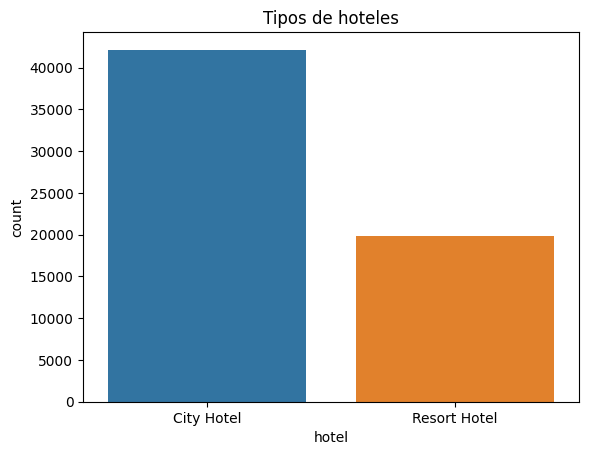

In [14]:
sns.countplot(x='hotel', data=hoteles, )
plt.title("Tipos de hoteles")
plt.show()

In [ ]:
hoteles["hotel"].value_counts()

City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64

Vemos que hay mas de el doble de reservas del City Hotel que del Resort Hotel.

VARIABLE **arrival_date_month**

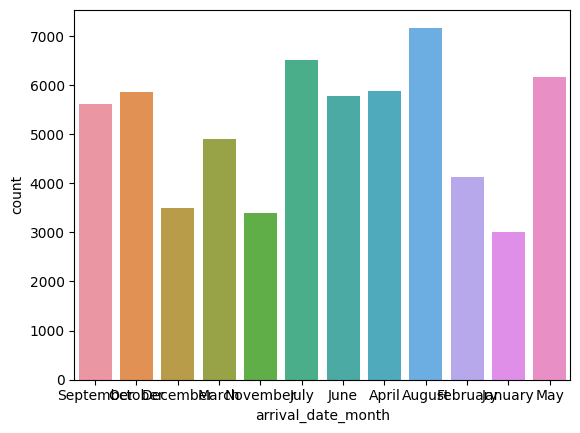

In [ ]:
sns.countplot(x='arrival_date_month', data=hoteles, )
plt.show()

La mayor cantidad de arrivos se da en agosto.

**VARIABLE MEAL**

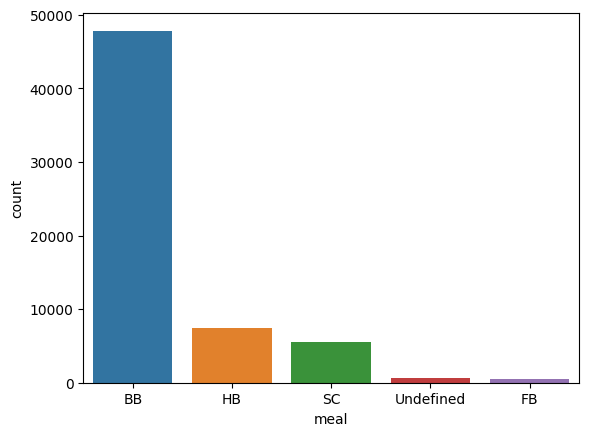

In [ ]:
sns.countplot(x='meal', data=hoteles, )
plt.show()

In [ ]:
hoteles["country"]

0        USA
1        PRT
2        CHE
3        PRT
4        FRA
        ... 
61908    ESP
61909    FRA
61910    FRA
61911    PRT
61912    ISR
Name: country, Length: 61913, dtype: object

Vemos que hay muchos paises, hacemos un ranking de los 10 que mas aparecen

<Axes: xlabel='count', ylabel='country'>

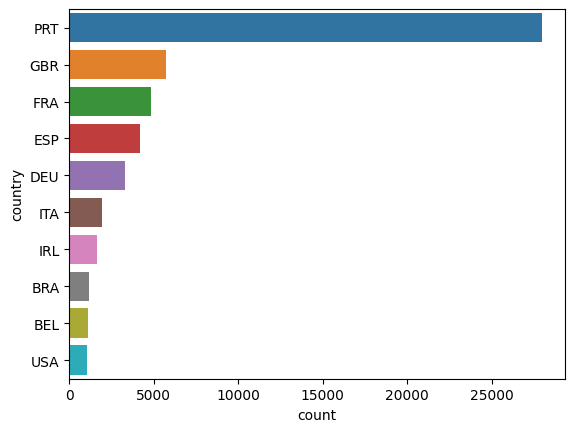

In [ ]:
sns.countplot(data=hoteles, y="country", order=hoteles.country.value_counts().iloc[:10].index)

VARIABLE MARKET SETTLEMENT

In [ ]:
hoteles["market_segment"]

0            Online TA
1               Groups
2            Online TA
3               Groups
4        Offline TA/TO
             ...      
61908        Online TA
61909        Online TA
61910         Aviation
61911           Groups
61912        Online TA
Name: market_segment, Length: 61913, dtype: object

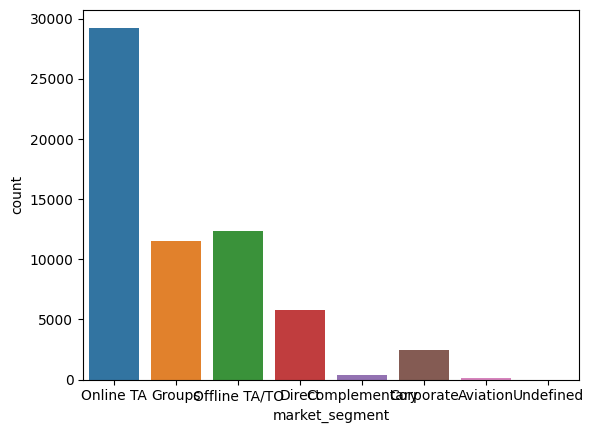

In [ ]:
sns.countplot(x='market_segment', data=hoteles, )
plt.show()

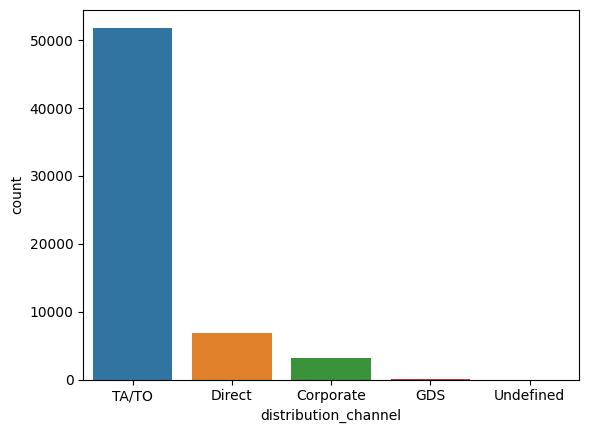

In [ ]:
sns.countplot(x='distribution_channel', data=hoteles, )
plt.show()

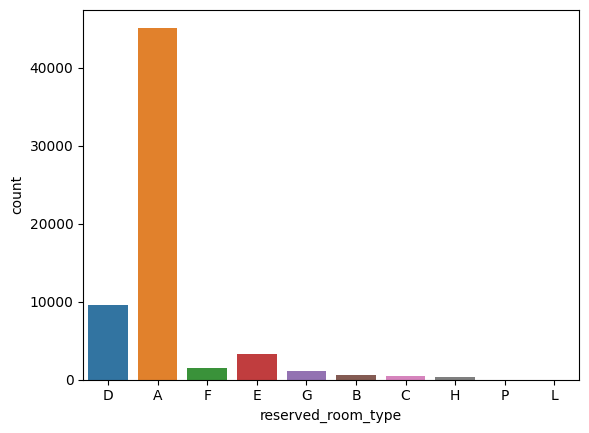

In [ ]:
sns.countplot(x='reserved_room_type', data=hoteles, )
plt.show()

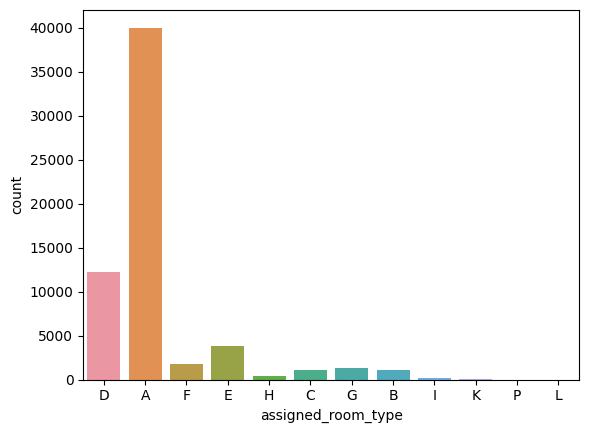

In [ ]:
sns.countplot(x='assigned_room_type', data=hoteles, )
plt.show()

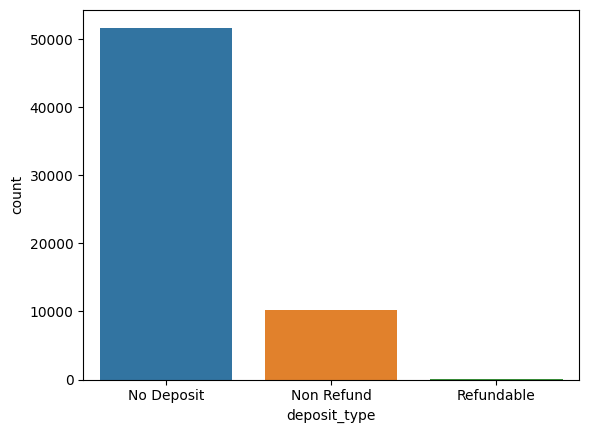

In [ ]:
sns.countplot(x='deposit_type', data=hoteles, )
plt.show()

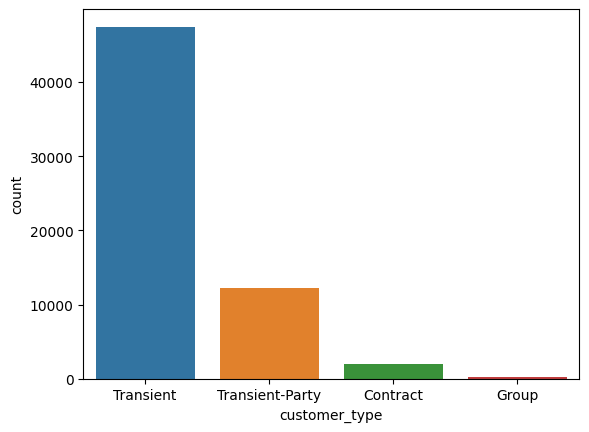

In [ ]:
sns.countplot(x='customer_type', data=hoteles, )
plt.show()

In [ ]:
hoteles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

In [ ]:
hoteles_cuanti = hoteles[["lead_time","arrival_date_year","arrival_date_week_number","arrival_date_day_of_month","stays_in_weekend_nights","stays_in_week_nights","adults","children","babies","is_repeated_guest","previous_cancellations","previous_cancellations","previous_bookings_not_canceled","booking_changes","agent","company","days_in_waiting_list","adr","required_car_parking_spaces","total_of_special_requests","is_canceled"]]

In [ ]:
matriz_corr=hoteles_cuanti.corr()
matriz_corr

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
lead_time,1.000000,0.023186,0.134793,-0.006937,0.059463,0.140110,0.110942,-0.046058,-0.022872,-0.108033,...,0.094634,-0.068102,-0.019736,-0.078786,0.150773,0.166423,-0.094559,-0.113772,-0.122760,0.293816
arrival_date_year,0.023186,1.000000,-0.540542,0.002326,0.027066,0.040803,0.026576,0.059412,-0.013745,-0.004587,...,-0.142232,0.027109,0.027285,0.081634,0.243066,-0.058523,0.217409,-0.011620,0.107899,0.019923
arrival_date_week_number,0.134793,-0.540542,1.000000,0.057730,0.014127,0.012200,0.025886,0.006355,0.016215,-0.022037,...,0.045530,-0.023897,0.012086,-0.043968,-0.040886,0.019328,0.075427,0.001424,0.029283,0.008357
arrival_date_day_of_month,-0.006937,0.002326,0.057730,1.000000,-0.015518,-0.026449,0.002449,0.013991,0.002568,-0.005230,...,-0.034516,-0.002026,0.009522,0.002600,0.049011,0.027754,0.033695,0.000295,0.007744,-0.007371
stays_in_weekend_nights,0.059463,0.027066,0.014127,-0.015518,1.000000,0.488710,0.083397,0.051987,0.021991,-0.080412,...,-0.011110,-0.037958,0.043753,0.150907,0.066591,-0.057509,0.061136,-0.014228,0.072150,0.001279
stays_in_week_nights,0.140110,0.040803,0.012200,-0.026449,0.488710,1.000000,0.087992,0.058278,0.021390,-0.088363,...,-0.013417,-0.045190,0.070094,0.197293,0.211214,-0.004139,0.082910,-0.021657,0.073356,0.028439
adults,0.110942,0.026576,0.025886,0.002449,0.083397,0.087992,1.000000,0.029215,0.014812,-0.129198,...,-0.003197,-0.096896,-0.045378,-0.030557,0.181019,-0.009420,0.221538,0.010593,0.107599,0.060179
children,-0.046058,0.059412,0.006355,0.013991,0.051987,0.058278,0.029215,1.000000,0.028946,-0.029847,...,-0.027296,-0.019686,0.058871,0.056140,0.033754,-0.035480,0.350482,0.045272,0.080017,0.006242
babies,-0.022872,-0.013745,0.016215,0.002568,0.021991,0.021390,0.014812,0.028946,1.000000,-0.008925,...,-0.007734,-0.005790,0.088186,0.036594,0.026146,-0.010863,0.033735,0.036372,0.093348,-0.032034
is_repeated_guest,-0.108033,-0.004587,-0.022037,-0.005230,-0.080412,-0.088363,-0.129198,-0.029847,-0.008925,1.000000,...,0.075981,0.406030,0.008407,0.018729,-0.233782,-0.021828,-0.132263,0.073732,0.015965,-0.090492


<Axes: >

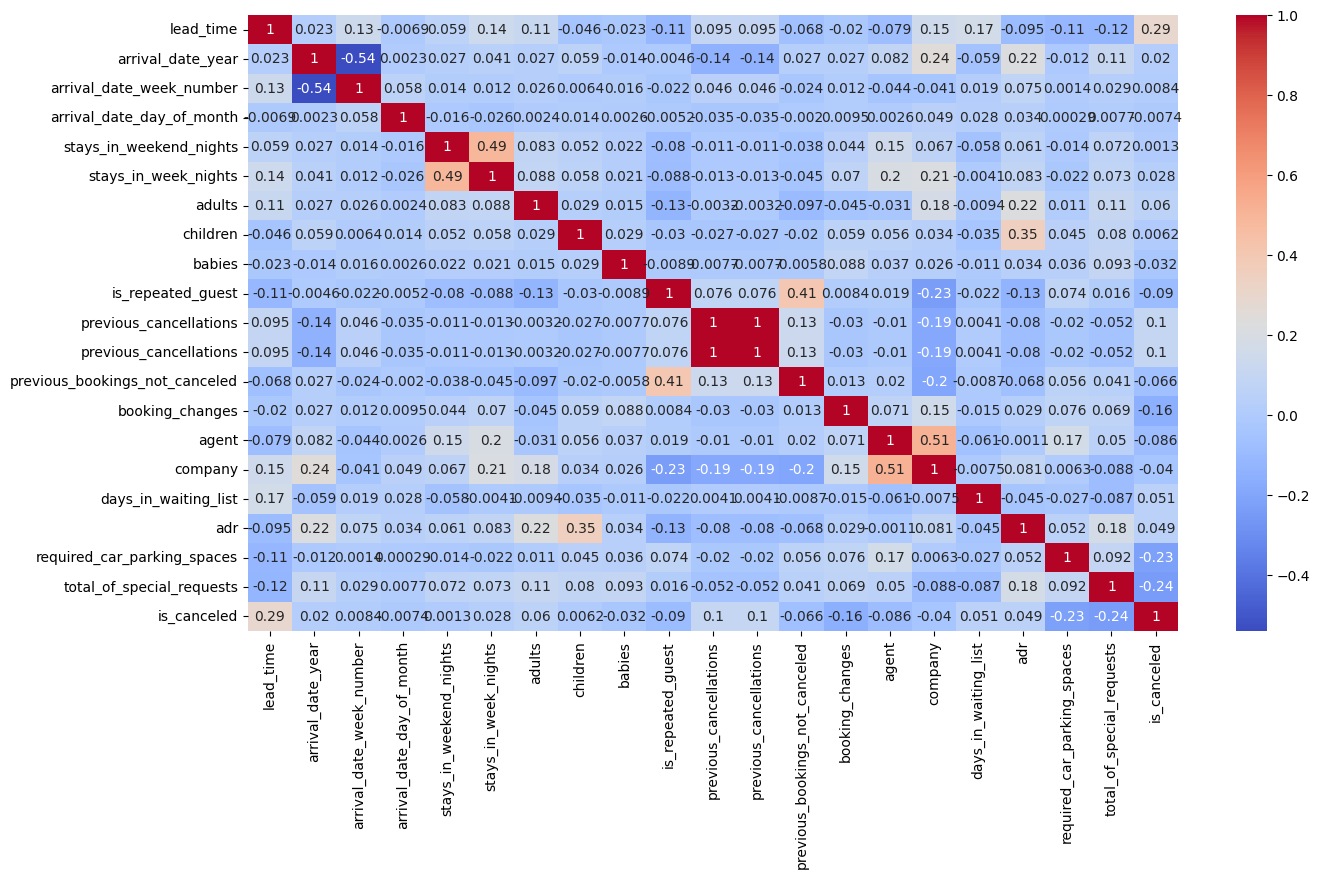

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(matriz_corr, annot = True, cmap='coolwarm')

### Variables cuantitativas

Filitramos el dataset para analizar sólo las variables numéricas

In [68]:
df_var_cual = hoteles.select_dtypes(include=['int'])
df_var_cual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   lead_time                       61913 non-null  int64
 1   arrival_date_year               61913 non-null  int64
 2   arrival_date_week_number        61913 non-null  int64
 3   arrival_date_day_of_month       61913 non-null  int64
 4   stays_in_weekend_nights         61913 non-null  int64
 5   stays_in_week_nights            61913 non-null  int64
 6   adults                          61913 non-null  int64
 7   babies                          61913 non-null  int64
 8   is_repeated_guest               61913 non-null  int64
 9   previous_cancellations          61913 non-null  int64
 10  previous_bookings_not_canceled  61913 non-null  int64
 11  booking_changes                 61913 non-null  int64
 12  days_in_waiting_list            61913 non-null  int64
 13  r

Graficamos la media, mediana y moda para todas las variables

In [82]:
df_var_cual.mean()

lead_time                          112.248187
arrival_date_year                 2016.154749
arrival_date_week_number            27.218080
arrival_date_day_of_month           15.785812
stays_in_weekend_nights              0.924135
stays_in_week_nights                 2.510054
adults                               1.862791
babies                               0.007155
is_repeated_guest                    0.027991
previous_cancellations               0.114790
previous_bookings_not_canceled       0.115420
booking_changes                      0.195952
days_in_waiting_list                 2.638977
required_car_parking_spaces          0.049957
total_of_special_requests            0.523703
is_canceled                          0.499750
dtype: float64

<BarContainer object of 16 artists>

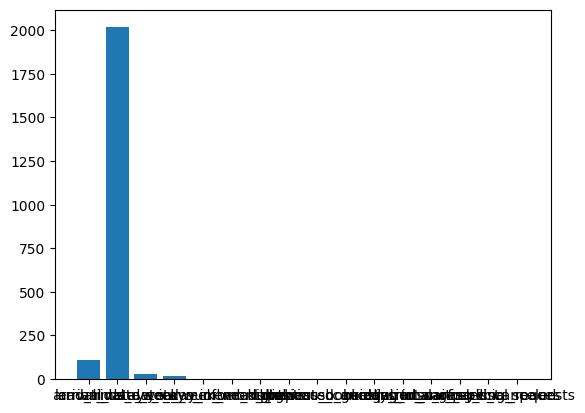

In [81]:
fig, ax = plt.subplots()
eje_x = df_var_cual.columns.to_list()
eje_y = [round(elem, 2) for elem in df_var_cual.mean().values.tolist()]
ax.bar(eje_x, eje_y)

## Datos Faltantes

In [36]:
hoteles.isna().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


Vemos que country, agent y company tienen valores faltantes